<a href="https://colab.research.google.com/github/mrqasimasif/Learn_Machine_Learning/blob/master/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
import pickle

In [0]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
  test_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
  valid_data = pickle.load(f)

In [0]:
x_train, y_train = train_data['features'], train_data['labels']
x_test, y_test = test_data['features'], test_data['labels']
x_valid, y_valid = valid_data['features'], valid_data['labels']

In [12]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


(32, 32, 3)


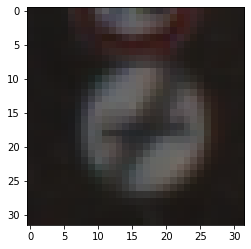

In [14]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print(x_train[0].shape)

In [15]:
import pandas as pd
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [0]:
import keras
from keras.models import Sequential 
from keras.optimizers import Adam
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout

#model

model = Sequential()
model.add(Conv2D(30,(5,5),input_shape=(32,32,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(15,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
import cv2

def gray(img):
  img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img

def equalize(img):
  img = cv2.equalizeHist(img)
  return img

def preprocessor(img):
  img = gray(img)
  img = equalize(img)
  img = img/255
  return img



In [0]:
import numpy as np

x_train = np.array(list(map(preprocessor,x_train)))
x_test = np.array(list(map(preprocessor,x_test)))
x_valid = np.array(list(map(preprocessor,x_valid)))

(32, 32)


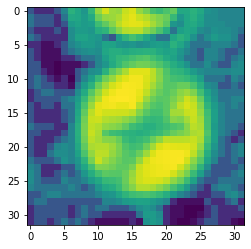

In [26]:
plt.imshow(x_train[0])
print(x_train[0].shape)

In [31]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)              

In [0]:
from keras.utils.np_utils import to_categorical

y_cat_train = to_categorical(y_train,43)
y_cat_test = to_categorical(y_test,43)
y_cat_valid = to_categorical(y_valid,43)

x_train = x_train.reshape(34799,32,32,1)
x_test = x_test.reshape(12630,32,32,1)
x_valid = x_valid.reshape(4410,32,32,1)

In [39]:
model.fit(x_train,y_cat_train,epochs=20,batch_size=400,shuffle=1)

Epoch 1/20
34799/34799 [==============================] - 26s 755us/step - loss: 0.0162 - acc: 0.9945
Epoch 2/20
34799/34799 [==============================] - 26s 751us/step - loss: 0.0119 - acc: 0.9965
Epoch 3/20
34799/34799 [==============================] - 26s 752us/step - loss: 0.0116 - acc: 0.9961
Epoch 4/20
34799/34799 [==============================] - 26s 753us/step - loss: 0.0139 - acc: 0.9953
Epoch 5/20
34799/34799 [==============================] - 26s 746us/step - loss: 0.0170 - acc: 0.9944
Epoch 6/20
34799/34799 [==============================] - 26s 751us/step - loss: 0.0128 - acc: 0.9959
Epoch 7/20
34799/34799 [==============================] - 26s 734us/step - loss: 0.0123 - acc: 0.9958
Epoch 8/20
34799/34799 [==============================] - 25s 730us/step - loss: 0.0113 - acc: 0.9962
Epoch 9/20
34799/34799 [==============================] - 25s 723us/step - loss: 0.0104 - acc: 0.9966
Epoch 10/20
34799/34799 [==============================] - 25s 721us/step - loss: 

In [0]:
model.save("model.h5")